# Modelo de detección de emociones en perros

Conectar con Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Importar librerías

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.applications import VGG16 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers

Obtener las imágenes

In [3]:
%cd "/content/drive/MyDrive/IA/Proyecto"
path = "/content/drive/MyDrive/IA/Proyecto"

base_dir = 'images'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir, 'test')

/content/drive/MyDrive/IA/Proyecto


Data augmentation

Se voltearon las imágenes vertical y horizontalmente y se rotaron las imágenes 40 grados porque las fotos de perros suelen ser tomadas desde distintos ángulos. También se alargaron las imágenes para obtener escenarios con perros de distintas dimensiones.

Found 900 images belonging to 3 classes.


<Figure size 640x480 with 0 Axes>

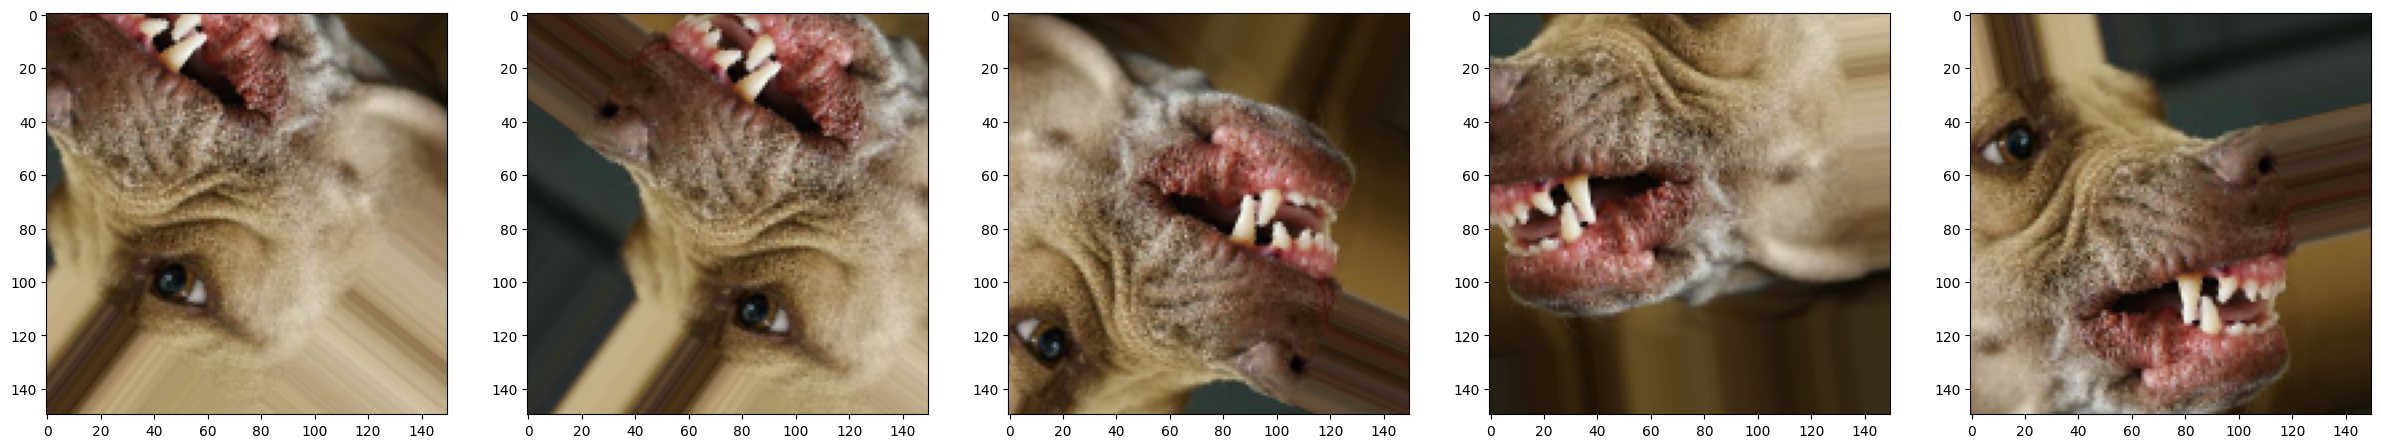

In [4]:
train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 40,
							width_shift_range = 0.2,
							height_shift_range = 0.2,
							shear_range = 0.3,
							horizontal_flip = True,
							vertical_flip = True,)

train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 8,
							class_mode ='categorical',
							)

plt.figure()

f, axarr = plt.subplots(1, 5, figsize=(30, 8)) 

for i in range(5) :
  axarr[i].imshow(train_generator[0][0][0])

Definición de las capas del modelo

Para la versión dos del modelo también se utilizó VGG16.

In [8]:
model = models.Sequential()

conv_base= VGG16(include_top = False,
								input_shape = (150,150,3),
								classes = 3)

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(3,activation='softmax'))

for layer in conv_base.layers[:-1]:
	conv_base.trainable = False 

for layer in conv_base.layers[-1:]:
	conv_base.trainable = True 
 
model.summary()

model.compile(loss='categorical_crossentropy',
						optimizer=optimizers.RMSprop(learning_rate=2e-5),
						metrics=['acc'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                

Entrenamiento del modelo

Epoch 1/40
113/113 [==============================] - 251s 2s/step - loss: 1.0938 - acc: 0.4311
Epoch 2/40
113/113 [==============================] - 12s 107ms/step - loss: 1.0141 - acc: 0.4811
Epoch 3/40
113/113 [==============================] - 12s 108ms/step - loss: 0.9401 - acc: 0.5422
Epoch 4/40
113/113 [==============================] - 12s 109ms/step - loss: 0.8676 - acc: 0.5911
Epoch 5/40
113/113 [==============================] - 12s 109ms/step - loss: 0.7921 - acc: 0.6300
Epoch 6/40
113/113 [==============================] - 12s 104ms/step - loss: 0.7304 - acc: 0.6778
Epoch 7/40
113/113 [==============================] - 13s 110ms/step - loss: 0.6960 - acc: 0.7011
Epoch 8/40
113/113 [==============================] - 13s 111ms/step - loss: 0.6274 - acc: 0.7444
Epoch 9/40
113/113 [==============================] - 13s 110ms/step - loss: 0.5838 - acc: 0.7533
Epoch 10/40
113/113 [==============================] - 12s 107ms/step - loss: 0.5638 - acc: 0.7567
Epoch 11/40
113/113 [

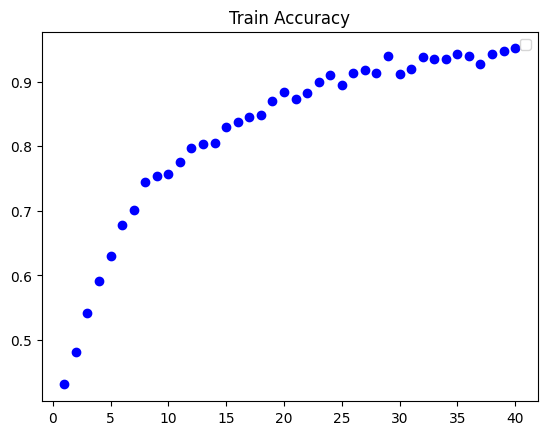

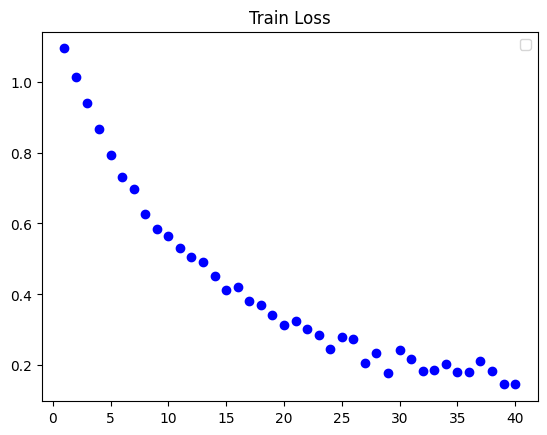

In [9]:
history = model.fit(train_generator, epochs = 40)
				
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo')
plt.title('Train Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo')
plt.title('Train Loss')
plt.legend()

plt.show()

Evaluación del modelo



In [10]:
test_datagen = ImageDataGenerator(1./255)

test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (150, 150),
					batch_size = 20,
					class_mode= 'categorical')

test_loss, test_acc = model.evaluate(test_generator, steps = 25)

print('\nTest accuracy : ', test_acc)


Found 2100 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


25/25 [==============================] - 80s 3s/step - loss: 113.2967 - acc: 0.6560

Test accuracy :  0.656000018119812


Referencias

[1] Y. Mao and Y. Liu,"Pet dog facial expression recognition based on convolutional neural network and improved whale optimization algorithm". Springer Nature Scientific Reports. Feb. 2023. doi: 10.1038/s41598-023-30442-0